# SQL 的五十道練習：初學者友善的資料庫入門

> 簡介

In [1]:
import ks2021
import sqlite3
import pandas as pd

## 什麼是 SQL

SQL 是由 **S**tructured **Q**uery **L**anguage 三個單字的字首組成的縮寫，而 SQL 的唸法一般有兩種，有些人偏好 ess-que-ell，也就是將三個英文字母 S、Q、L 分別唸出；有些人偏好 sequel，也就是在其中加入母音連結，變成一個能夠發音的單字，兩種唸法都被廣泛地採用，讀者可以根據自己的偏好選擇。

Structured Query Language 直接翻譯是結構化查詢語言，但直接翻譯對這個語言的理解毫無幫助，我們試圖用一句話解釋：

> SQL 是 Structured Query Language 的縮寫，是一個專門針對關聯式資料庫中所儲存的資料進行查詢、定義、操作與控制的語言。

SQL 在 1970 年代由國際商業機器公司（IBM）創造，剛開發出來時候僅只是為了更有效率地「查詢」儲存於關聯式資料庫中的資料，但是到了現代，除了查詢以外像是資料的建立、更新與刪除，也都能靠著 SQL 來完成。具體來說，SQL 是由保留字（Keyword）、符號、常數與函數所組合而成的一種語言，按照使用目的可以再細分為資料查詢語言（Data Query Language, DQL）、資料定義語言（Data Definition Language, DDL）、資料操作語言（Data Manipulation Language, DML）、資料控制語言（Data Control Language, DCL）以及交易控制語言（Transaction Control Language, TCL）；本書是初學者友善的導向，內容會以資料查詢語言為主，資料定義語言與資料操作語言為輔。

|SQL 的分類|範例|
|:---------|:----|
|資料查詢語言（Data Query Language, DQL）|`SELECT ...`|
|資料定義語言（Data Definition Language, DDL）|`CREATE ...`|
|資料操作語言（Data Manipulation Language, DML）|`UPDATE ...`|
|資料控制語言（Data Control Language, DCL）|`GRANT ...`|
|交易控制語言（Transaction Control Language, TCL）|`COMMIT`|

因此我們可以理解 SQL 是一個能夠與關聯式資料庫互動的專用語言，常見的互動有四個：包含創造（Create）、查詢（Read）、更新（Update）與刪除（Delete），這四個動作又在業界與社群被簡稱為 CRUD，聽起來十分抽象，但其實與現代生活形影不離。舉例來說在社群應用程式中的一舉一動，不論是透過滑鼠點擊或者手勢觸控，都會被應用程式轉換為 CRUD 的指令：上傳新的動態與貼文，就是創造的體現；瀏覽追蹤對象的動態與貼文，就是查詢的體現；編輯動態與貼文，就是更新的體現；撤掉動態與貼文，就是刪除的體現。

![](../images/hugh-han-5pkYWUDDthQ-unsplash.jpg)

來源：[Photo by Hugh Han on Unsplash](https://unsplash.com/photos/5pkYWUDDthQ)

SQL 雖然早於 1970 年代問世，但一直到了 2020 年代依然是資料科學家與軟體工程師最仰賴的語言之一。根據資料科學家社群 Kaggle 以及軟體工程師社群 StackOverflow 在 2021 年針對網站會員所發出的問卷，在 2021 Kaggle ML&DS Survey 中 SQL 在資料科學家日常頻繁使用語言中排名第二、在資料科學家推薦學習語言中排名第三、Stack Overflow 2021 Developer Survey 中 SQL 在軟體工程師受歡迎技術中排名第四、Google 資料分析專業證照也有涵蓋 SQL 的教學，學習 SQL 的重要性不言可喻。

In [2]:
csv_file = "https://kaggle-ml-ds-survey.s3.ap-northeast-1.amazonaws.com/kaggle-survey-2021/kaggle_survey_2021_responses.csv"
ks = ks2021.KaggleSurvey2021(csv_file)
ks.generate_question_table()

,question_index,question_description,question_type
0,Q1,What is your age (# years)?,multiple choice
1,Q2,What is your gender?,multiple choice
2,Q3,In which country do you currently reside?,multiple choice
3,Q4,What is the highest level of formal education ...,multiple choice
4,Q5,Select the title most similar to your current ...,multiple choice
5,Q6,For how many years have you been writing code ...,multiple choice
6,Q7,What programming languages do you use on a reg...,multiple selection
7,Q8,What programming language would you recommend ...,multiple choice
8,Q9,Which of the following integrated development ...,multiple selection
9,Q10,Which of the following hosted notebook product...,multiple selection


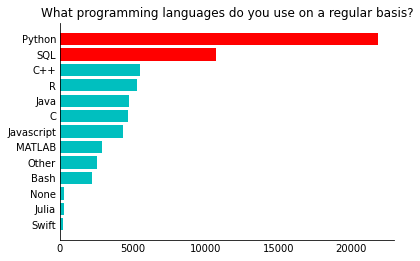

In [3]:
ks.plot_survey_summary(question_index="Q7", n=2)

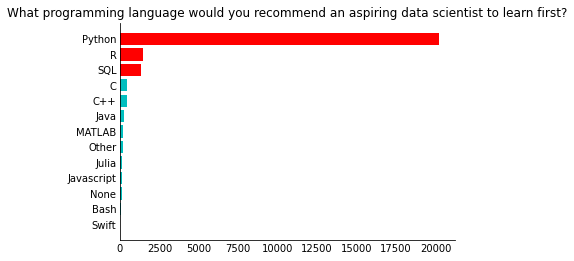

In [4]:
ks.plot_survey_summary(question_index="Q8", n=3)

![](../images/ranked_4th.png)

來源：<https://insights.stackoverflow.com/survey/2021>

![](../images/google-data-analytics.png)

來源：<https://www.coursera.org/professional-certificates/google-data-analytics>

## 什麼是關聯式資料庫

欲解釋何謂關聯式資料庫，我們將它拆成「關聯式」與「資料庫」分別定義。資料庫是一種特定、經過加工的資料集合，能夠放置在伺服器、個人電腦、手機或者微型電腦之中，資料庫可以透過 SQL 與之互動，有效率地進行資料查詢、定義、操作與控制。關聯式則是描述資料庫中的資料集合是以列（Rows）與欄（Columns）所組成的二維表格形式記錄，並且遵守關聯式模型準則設計，這樣的資料庫就被稱為關聯式資料庫。有時列也有其他別名，像是紀錄（Records）、觀測值（Observations）、元組（Tuples）等；欄的其他別名則有欄位（Fields）、變數（Variables）、屬性（Attributes）等。

![](../images/Relational_database_terms.png)

來源：<https://en.wikipedia.org/wiki/Relational_database>

什麼樣的資料集合能夠被稱為是資料庫呢？大致來說必須要同時具備兩個特徵：

1. 觀測值必須具備屬性。
2. 資料集合必須具備元資料（Metadata）。

第一個特徵是描述資料表內容必須是完整的，觀測值與屬性都要具備，例如 `id` 到 `runtime` 這六個變數名稱就是屬性的體現。

In [5]:
conn = sqlite3.connect('../databases/imdb.db')
pd.read_sql("""SELECT * FROM movies LIMIT 5;""", conn)

,id,title,release_year,rating,director,runtime
0,1,The Shawshank Redemption,1994,9.3,Frank Darabont,142
1,2,The Godfather,1972,9.2,Francis Ford Coppola,175
2,3,The Dark Knight,2008,9.1,Christopher Nolan,152
3,4,The Godfather: Part II,1974,9.0,Francis Ford Coppola,202
4,5,12 Angry Men,1957,9.0,Sidney Lumet,96


如果資料只有觀測值而沒有屬性，例如二維陣列，就不是具備資料庫特徵的資料集合。

In [6]:
pd.read_sql("""SELECT * FROM movies LIMIT 5;""", conn).loc[:, ].values

array([[1, 'The Shawshank Redemption', 1994, 9.3, 'Frank Darabont', 142],
       [2, 'The Godfather', 1972, 9.2, 'Francis Ford Coppola', 175],
       [3, 'The Dark Knight', 2008, 9.1, 'Christopher Nolan', 152],
       [4, 'The Godfather: Part II', 1974, 9.0, 'Francis Ford Coppola',
        202],
       [5, '12 Angry Men', 1957, 9.0, 'Sidney Lumet', 96]], dtype=object)

如果資料只有屬性而沒有擺放觀測值的位置，例如一維陣列，就不是具備資料庫特徵的資料集合。

In [7]:
conn = sqlite3.connect('../databases/imdb.db')
pd.read_sql("""SELECT * FROM movies LIMIT 5;""", conn).columns

Index(['id', 'title', 'release_year', 'rating', 'director', 'runtime'], dtype='object')

第二個特徵是資料集合必須要具備能夠自我解釋（Self-explainable）的能力，這個能力就是所謂的元資料（Metadata），元資料直接翻譯為描述資料的資料，但直接翻譯對這個名詞的理解有限，比較能夠幫助理解的譬喻是元資料就像英英字典，當我們在查詢英文單字時英英字典會用另外一段英文來描述；當我們在查詢資料表的詳細資料時，元資料會用另外一個資料表來描述。

In [8]:
pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('movies');""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0
2,2,release_year,INTEGER,0,None,0
3,3,rating,REAL,0,None,0
4,4,director,TEXT,0,None,0
5,5,runtime,INT,0,None,0


## 什麼是關聯式資料庫管理系統

管理關聯式資料庫的電腦軟體稱為關聯式資料庫管理系統（Relational Database Management System, RDBMS），透過關聯式資料庫管理系統，可以讓關聯式資料庫具有多人共用、處理大量資料、自動化讀寫與備份等功能。常見的關聯式資料庫管理系統大致可以分為商業授權與開放原始碼兩個大類：

- 商業授權
    - DB2：國際商業機器公司的關聯式資料庫管理系統。
    - SQL Server：微軟公司的關聯式資料庫管理系統。
    - Oracle Database：甲骨文公司的關聯式資料庫管理系統。
- 開放原始碼
    - MySQL：開放原始碼的關聯式資料庫管理系統，現為甲骨文公司所有。
    - MariaDB：開放原始碼的關聯式資料庫管理系統，是 MySQL 的分支。
    - SQLite：開放原始碼的關聯式資料庫管理系統。

由於各種關聯式資料庫管理系統都支援標準 SQL，多數時候標準 SQL 就能順利在上述常見的關聯式資料庫管理系統運行，只有少數時候必須要使用專用語法，因此初學者從學習任何一個關聯式資料庫管理系統起步皆可。而本書會以輕量、無伺服器架構並且與主流程式語言都能串接的 SQLite 開放原始碼關聯式資料庫管理系統為準。除了關聯式資料庫管理系統以外，還有非關聯式資料庫管理系統（NoSQL Database Management System），這是一種非結構化、非列與欄資料表結構的資料集合模型，通常會在注重資料儲存彈性的應用場景時被採用。本書聚焦的 SQL 是一個專門針對關聯式資料庫中所儲存的資料進行查詢、定義、操作與控制的語言，所以並不會涉及到非關聯式資料庫管理系統。

## SQL 與關聯式資料庫管理系統是重要的

SQL 與關聯式資料庫管理系統不論是對於資料科學家、軟體工程師都是至關重要的語言與技術，在資料科學應用領域中，關聯式資料庫管理系統是常見的資料來源，對於在大型企業工作的資料科學家來說更是如此，透過 SQL 能夠載入產品、服務與財務的相關數據進行分析探索；在軟體開發領域中，關聯式資料庫管理系統是網頁應用程式、手機應用程式或桌面應用程式不可或缺的一環，透過 SQL 能夠讓應用程式的使用者與資料進行互動。就算並非從事資料科學、軟體開發的相關領域工作，生活中關聯式資料庫管理系統也是無所不在，小至手機的通話紀錄與通訊錄、大至社群應用程式與購物網站、銀行的存款與交易資訊，能夠讓成千上萬個使用者自動化、大規模地同時運作無虞，背後都有 SQL、關聯式資料庫管理系統與應用程式在支撐。

![](../images/sql_rdb_rdbms.png)

## 重點統整

- SQL 是 Structured Query Language 的縮寫，是一個專門針對關聯式資料庫中所儲存的資料進行查詢、定義、操作與控制的語言。
- SQL 雖然早於 1970 年代問世，但一直到了 2020 年代依然是資料科學家與軟體工程師最仰賴的語言之一。
- 什麼樣的資料集合能夠被稱為是資料庫呢？大致來說必須要同時具備兩個特徵：
    - 觀測值必須具備屬性。
    - 資料集合必須具備元資料（Metadata）。
- 管理關聯式資料庫的電腦軟體稱為關聯式資料庫管理系統（Relational Database Management System, RDBMS），透過關聯式資料庫管理系統，可以讓關聯式資料庫具有多人共用、處理大量資料、自動化讀寫與備份等功能。

## 延伸閱讀

- 2021 Kaggle Machine Learning & Data Science Survey <https://www.kaggle.com/c/kaggle-survey-2021>
- Stack Overflow Developer Survey 2021 <https://insights.stackoverflow.com/survey/2021>